In [96]:
import csv
import pandas as pd
import re
import emoji
import nltk
from ekphrasis.classes.segmenter import Segmenter
import preprocessor as p
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('words')
words = set(nltk.corpus.words.words())

#column_name = ['Date','Tweet']
origin = pd.read_csv("dogecoin-full.csv")

origin.columns = column_name

Tweet_tgt = origin['Tweet']

#print(Tweet_tgt)

[nltk_data] Downloading package words to /Users/ZhaoLi/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [97]:
#segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus='twitter')

data = []
#forming a separate feature for cleaned tweets
for i,v in enumerate(Tweet_tgt):
    data.append(p.clean(v))

nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        if new_word != '':
            new_words.append(new_word)
    return new_words

lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()

def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]


df = pd.DataFrame(data,columns=["Tweet"])
stop_words = set(stopwords.words('english'))
cleaned_data = df.apply(lambda x: [item for item in \
x if item not in stop_words])

Reading twitter - 1grams ...
Reading twitter - 2grams ...


[nltk_data] Downloading package wordnet to /Users/ZhaoLi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ZhaoLi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
z = lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip())

full_data = []
#cnt = 0
for i in cleaned_data["Tweet"]:
    result = []
    sentence = z(i.replace("b'RT :", "").replace("b'","").replace('b"RT', ''))
    sentence = sentence.strip()
    cleaned_sentence = sentence.split()
    cleaned_sentence = list(filter(lambda x:x[0:1]!= "\\", sentence.split()))
    
    #print(sentence)
    for j in cleaned_sentence:
        sep = '\\'
        stripped = j.split(sep, 1)[0]
        #print(stripped)
        result.append(stripped)
        cnt += 1
    #print(cnt)
    full_data.append(result)
print(full_data)

[['Giving', 'away', 'Million', 'to', 'people!', 'Ends', 'in', 'hours', 'Like', '+', 'Follow', 'me'], ['HODLERS:', 'Here', 'is', 'a', 'true', 'fact.', 'When', 'goes', 'on', ',', 'he', 'won', 'call', 'a', 'like'], ['The', 'Dividend', 'Doge', 'Whitelist', 'Presale', 'competition', 'is', 'live!', 'spots', 'up', 'for', 'grabs', 'by', 'entering', 'through', "heren'"], ['hits', '$0.32', 'cents', 'today', 'I', 'give', 'everybody', 'who', 'follows', 'me', 'and', 'Retweet', 'This', '$DOGE', 'each!', 'Let', "goooooo'"], [':', 'So,', 'this', 'actually', 'happened', 'A', 'legit', 'conversation', 'between', 'me', '&amp;', 'hubby', 'this', 'week.', 'It', 'was', 'kinda', 'funny', 'so', 'I', 'figured', "I'd", 'm'], ['Nope.', 'Low', 'cap', 'right', 'now.', 'Also,', 'please', 'tell', '$Doge', 'holders', 'that', 'could', 'never', 'be', 'a', 'real', 'coin', 'and', "'"], [':', 'If', 'you', "weren't", 'online', 'this', 'week', 'or', 'in', 'case', 'you', "didn't", 'visit', 'yet,', 'we', 'gave', 'him', 'a', 's

In [109]:
#Code to remove the most common daily used words
total = []
for i in full_data:
    total += i

common = ["'",'The','I', ':','&amp;', 'all', 'just', 'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once']

not_common = []
for i in total:
    if i not in common:
        not_common.append(i)

from collections import Counter

counter = Counter(not_common).most_common()

print(counter)

[('If', 1565), ('second', 1244), ('visit', 1231), ('week', 1219), ("didn't", 1214), ('case', 1213), ('life,', 1213), ('online', 1211), ("weren't", 1208), ('yet,', 1208), ('gave', 1208), ('Follow', 1062), ('+', 944), ('hours', 858), ('Like', 666), ('people!', 665), ('away', 659), ('Giving', 651), ('Million', 651), ('Ends', 651), ('$DOGE', 600), ('project', 501), (',', 453), ('Token', 421), ('get', 404), ('moon', 386), ('$100', 340), ('pinned', 339), ('!!!', 337), ('Bring', 310), ('faster!', 309), ('literal', 309), ('want...', 309), ('cents', 301), ('Let', 296), ('follows', 294), ('today', 291), ('give', 287), ('This', 286), ('"', 280), ('hits', 279), ('us', 279), ('everybody', 277), ('each!', 276), ("goooooo'", 276), ('%', 274), ('!', 262), ('tweet', 262), ('want', 257), ('RT', 243), ('||', 242), ('one', 241), ('.', 239), ('-', 227), ('buy', 227), ('people', 226), ('$Doge', 219), ('retweets', 219), ('Dogecoin', 219), ('$0.33', 217), ('lot', 209), ('th', 206), ('$50', 204), ('$150', 203)

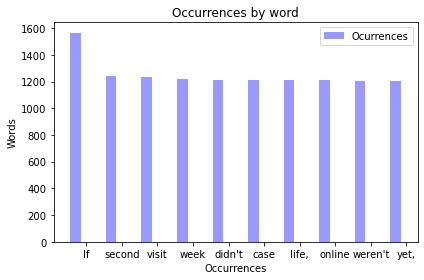

In [111]:
#Code to build a view for the most frequent words used
import matplotlib.pyplot as plt
import numpy as np

data = counter[:10]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
cnt = 0
doge_list = []
for i in range(len(df)):
    if any("doge" in s.lower() for s in full_data):
        cnt += 1
        doge_list.append(full_data[i])
        #print(origin['created_at'][i], full_data[i])
print("Tweets has mentioned Doge " + str(cnt) + " times in 8/19")
#print(doge_list)

Tweets has mentioned Doge 9626 times in 8/19


In [101]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
total_sentiment = 0
for sentence in doge_list:
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
    total_sentiment += vs['compound']

print(total_sentiment)

Giving away Million to people! Ends in hours \n\nRT+ Like + Follow me \xf0\x9f\x9a\x80\xf0\x9f\x8c\x95\n\n' {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.636}
HODLERS: Here is a true fact. When goes on , he won\xe2\x80\x99t call a \xe2\x80\x9cHUSTLE\xe2\x80\x9d like \xe2\x80\xa6' {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.6486}
The Dividend Doge Whitelist Presale competition is live! \n\n50 spots up for grabs by entering through heren' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hits $0.32 cents today I\xe2\x80\x99ll give everybody who follows me and Retweet This $DOGE each! Let\xe2\x80\x99s goooooo' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
: So, this actually happened \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3 A legit conversation between me &amp; hubby this week. It was kinda funny so I figured I'd m\xe2\x80\xa6" {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3832}
Nope. Low cap right now. Also, please tell $Doge holders that could never be a

: If you weren't online this week or in case you didn't visit yet, we gave him a second life, an\xe2\x80\xa6" {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Leg up or leg down? you know what one we all want, make it happen, we make it happen! ' {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.1511}
: If you weren't online this week or in case you didn't visit yet, we gave him a second life, an\xe2\x80\xa6" {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Giving away Million to people! Ends in hours \n\nRT+ Like + Follow me \xf0\x9f\x9a\x80\xf0\x9f\x8c\x95\n\n' {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.636}
\n \xe2\x80\xa6'------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
will blast off before you least expect it! RETWEET IF YOU AGREE!' {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.5882}
Enough with the $1 goal or dogecoin to $1 thing. Let\xe2\x80\x99s ride the train to the moon and beyond. Let

It has begun\n\n$doge \n\n \n\n'--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Another idea would be good a house, a staking platform for all ya related coins in one place earning \xe2\x80\xa6' {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}
: So, this actually happened \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3 A legit conversation between me &amp; hubby this week. It was kinda funny so I figured I'd m\xe2\x80\xa6" {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3832}
$150 in hours \n\n\xf0\x9f\x8c\xae $100 for RT &amp; Follow us &amp; and RT/Like their pinned tweet \xf0\x9f\x93\x8c\n\n\xf0\x9f\x8c\xb6 Additional $50 if own $LUCHO\xe2\x80\xa6' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
$Doge is going to soon.\nGet ready....\nSecret news.,...be ready....\nDo not panic sell...\n \xe2\x80\xa6 ' {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4023}
Great project\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\n\n \n \n \n\n $newinu ' {'

It\xe2\x80\x99s awesome to see upcoming events by the community\n\nDoge pop up - New York / Sep th\nHosted by \xe2\x80\xa6' {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6249}
will blast off before you least expect it! RETWEET IF YOU AGREE!' {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.5882}
: I'm FutureJose69 from .\nMemeries - DogeStation.\n "----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Rollercoin Online Bitcoin Mining Simulator. \nFun Game. \n\nFree!! Even earn free \n\n' {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.5972}
: There's a new top-dog in town! "------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
FOLLOW IF YOUR A MM HOLDER AND SUPPORT THE MOVE MILLION TOKEN!\n\n \n\xe2\x80\xa6' {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.5754}
will blast off before you least expect it! RETWEET IF YOU AGREE!' {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.5882}
Giving away Million to peopl

Polka Classic Token (DOTC) launched th July &amp; is a x-1000x GEM\n\nPolka Classic is going to surpass the stride of Dog\xe2\x80\xa6' {'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.128}
without dogs'---------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Giving away Million to people! Ends in hours \n\nRT+ Like + Follow me \xf0\x9f\x9a\x80\xf0\x9f\x8c\x95\n\n' {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.636}
An amazing project and this projector has a lot of attractions.I hope the project will be better i\xe2\x80\xa6 ' {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8625}
I remember when all the financial discords were banning people for mentioning , now all the stock and crypto \xe2\x80\x9cgurus\xe2\x80\x9d\xe2\x80\xa6' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Giving away Million to people! Ends in hours \n\nRT+ Like + Follow me \xf0\x9f\x9a\x80\xf0\x9f\x8c\x95\n\n' {'neg': 0.0, 'neu': 0.698, 'pos

SALES TODAY!\nI want my NFTs to be accessible. Don\xc2\xb4t like buying ETH and paying for GAS? These are sold in \xe2\x80\xa6 ' {'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.4753}
Giving away Million to people! Ends in hours \n\nRT+ Like + Follow me \xf0\x9f\x9a\x80\xf0\x9f\x8c\x95\n\n' {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.636}
$150 in hours \n\n\xf0\x9f\x8c\xae $100 for RT &amp; Follow us &amp; and RT/Like their pinned tweet \xf0\x9f\x93\x8c\n\n\xf0\x9f\x8c\xb6 Additional $50 if own $LUCHO\xe2\x80\xa6' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Giving away Million to people! Ends in hours \n\nRT+ Like + Follow me \xf0\x9f\x9a\x80\xf0\x9f\x8c\x95\n\n' {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.636}
My to Robinhood . '---------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
On your left \n \n '--------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Wak

: If you weren't online this week or in case you didn't visit yet, we gave him a second life, an\xe2\x80\xa6" {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
\xe2\x80\xa6 '--------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Giving away Million to people! Ends in hours \n\nRT+ Like + Follow me \xf0\x9f\x9a\x80\xf0\x9f\x8c\x95\n\n' {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.636}
\xe2\x80\xa6 '--------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
We\xe2\x80\x99re holding \xe2\x9c\xa8 '-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Check my website for \xe2\x80\xa6 '------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
: If you weren't online this week or in case you didn't visit yet, we gave him a second life, an\xe2\x80\xa6" {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Giving away Million to p

Good project!\n $newinu '---------------------------------------- {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}
: If you weren't online this week or in case you didn't visit yet, we gave him a second life, an\xe2\x80\xa6" {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
: If you weren't online this week or in case you didn't visit yet, we gave him a second life, an\xe2\x80\xa6" {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Eventually there will only be kind of money, dog money. '-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
We are proud to announce that we have secured a partnership with Foundation to launch the new Jurisdiction h\xe2\x80\xa6' {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.7003}
b"Good project \xf0\x9f\xa4\x9f\nI'm sure this project will grow rapidly and become one of the best projects in the world \xf0\x9f\xa4\x97\xe2\x80\xa6 " {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.7579}
: If you weren't online this

Check my website for \xe2\x80\xa6 '------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RETWEET Exclusive \xf0\x9f\x9a\xa8 The Conference \n\n\xe2\x9a\xa0\xef\xb8\x8fExclusive \xe2\x9a\xa0\xef\xb8\x8f The Doge Conference! MUCH WOW ' {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.745}
LETS GO WALMART &amp; '------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Witchdoctor Dog !!!\n\nThis NFT is inspired by the actual physical piece Witchdoctor Dog / Nkondi Nkisi\xe2\x80\xa6 ' {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.6219}
Hi Paris Hilton, huge fan here\xf0\x9f\x91\x8b Come join the community we are full of positive people who love dogs &amp; memes \xf0\x9f\xa5\xb0\xe2\x80\xa6' {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.9274}
$150 in hours \n\n\xf0\x9f\x8c\xae $100 for RT &amp; Follow us &amp; and RT/Like their pinned tweet \xf0\x9f\x93\x8c\n\n\xf0\x9f\x8c\xb6 Additional $50 if ow

b"I'm FutureJose69 from .\nMemeries - DogeStation.\n "----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
!!!\n\n$LOFI Token will get you to the moon faster! Bring your literal if you want...\n\n\xe2\x80\xa6' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
b"Former SEC Chair Jay Clayton Joins Crypto Firm Fireblocks' Advisory Board\n \xe2\x80\xa6 " {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Buy its still cheap and rising!!!\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\n\n ' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Check out , this new project is redefining what it means to be an exchange!\n \xe2\x80\xa6 ' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
When is going to tell us how much he owns?\n\nLike and retweet to get him to tell us. \n\nThank